# **ML in Drug Discovery using SWISSADME properties**



SWISSADME properties to build machine learning models for drug discovery is a great idea. SWISSADME gives you molecular descriptors and ADME (Absorption, Distribution, Metabolism, Excretion) properties—ideal features for predicting drug-likeness, activity, or toxicity
https://www.youtube.com/@Bioinformatics_Made_Easy


**Here’s a step-by-step guide, including code, on how to:**

Load SWISSADME data

Preprocess

Train multiple ML models

Evaluate and compare them

In [1]:
#🔬 Step 1: Install Necessary Libraries
!pip install pandas scikit-learn seaborn matplotlib xgboost

In [2]:
#🧪 Step 2: Load and Inspect SWISSADME Data
#Assume you have a CSV file (swissadme_data.csv) with:

#Features: physicochemical descriptors (like LogP, TPSA, molecular weight, etc.)

#Target: e.g., Active (1 for active drug, 0 for inactive)

import pandas as pd

# Load dataset
df = pd.read_csv("swissadme_1000.csv")

# Peek at the data
print(df.head())
print(df.info())


           MW      LogP       TPSA  NumHAcceptors  NumHDonors  RotatableBonds  \
0  374.835708  4.899355  61.496435              7           1               3   
1  343.086785  4.424634  72.109627              5           0               0   
2  382.384427  3.559630  59.151602              3           3               7   
3  426.151493  2.853063  68.840769              7           2               8   
4  338.292331  4.198223  37.127707              2           1               3   

   GI_absorption  BioavailabilityScore  Active  
0              0                  0.55       0  
1              1                  0.55       1  
2              1                  0.17       1  
3              1                  0.55       1  
4              0                  0.55       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MW     

In [3]:
#🧹 Step 3: Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume 'Active' is the target
X = df.drop(columns=['Active'])
y = df['Active']

# Split into training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
#🤖 Step 4: Train Multiple ML Models
#We'll compare: Logistic Regression, Random Forest, SVM, and XGBoost.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, preds))



Logistic Regression Accuracy: 0.49
              precision    recall  f1-score   support

           0       0.50      0.92      0.65       101
           1       0.43      0.06      0.11        99

    accuracy                           0.49       200
   macro avg       0.46      0.49      0.38       200
weighted avg       0.46      0.49      0.38       200


Random Forest Accuracy: 0.48
              precision    recall  f1-score   support

           0       0.49      0.63      0.55       101
           1       0.47      0.33      0.39        99

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.48      0.47       200


SVM Accuracy: 0.52
              precision    recall  f1-score   support

           0       0.51      0.79      0.62       101
           1       0.52      0.23      0.32        99

    accuracy                           0.52       200
   macro avg       0.52      0.51      0.4

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:02:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       101
           1       0.52      0.45      0.49        99

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.53      0.52       200



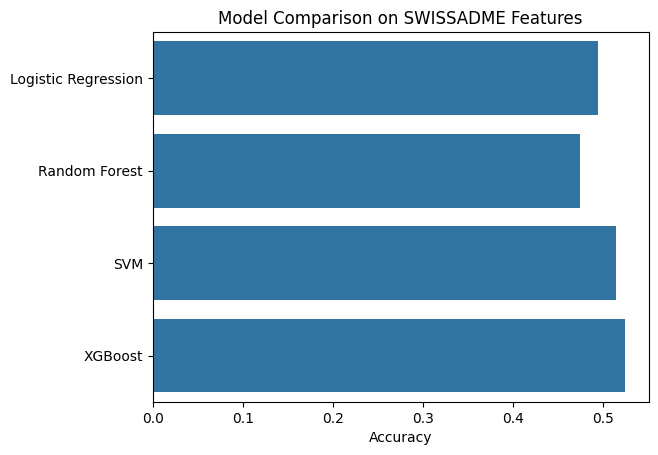

In [5]:
#📊 Step 5: Visualize the Comparison

import seaborn as sns
import matplotlib.pyplot as plt

# Plot accuracies
model_names = list(results.keys())
accuracies = list(results.values())

sns.barplot(x=accuracies, y=model_names)
plt.xlabel("Accuracy")
plt.title("Model Comparison on SWISSADME Features")
plt.show()


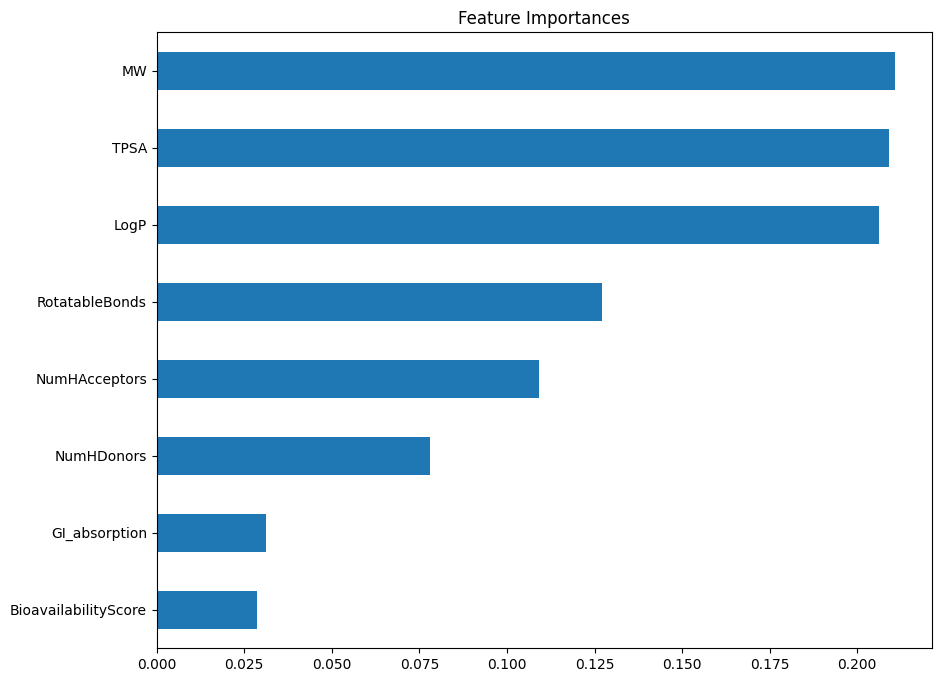

In [10]:
#Optional: Feature Importance (e.g., from Random Forest)

importances = models["Random Forest"].feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_importance.plot(kind='barh', figsize=(10, 8), title="Feature Importances")
plt.gca().invert_yaxis()
plt.show()

**Conclusion**

You'll see the accuracy, precision, recall, and F1-score for each model.

The bar plot helps compare model performance.

Feature importance shows which SWISSADME properties influence prediction the most.